In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


# Data Preprocessing

In [10]:
data.shape

(7920, 3)

In [11]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7915    False
7916    False
7917    False
7918    False
7919    False
Length: 7920, dtype: bool

In [12]:
data.duplicated().sum()

np.int64(0)

In [13]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

# Text Preprocessing

In [14]:
import re
import string

### CONVERT UPPERCASE TO LOWERCASE

In [15]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [16]:
data["tweet"].head()

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

### REMOVE LINKS

In [17]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [18]:
data["tweet"].head()

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

### Remove Punctuations

In [19]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
def punc(text):
    for punc in string.punctuation:
        text = text.replace(punc, '')
    return text

data["tweet"] = data["tweet"].apply(punc)

In [21]:
data.head(5)

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beaut...
1,2,0,finally a transparant silicon case thanks to ...
2,3,0,we love this would you go talk makememories un...
3,4,0,im wired i know im george i was made that way ...
4,5,1,what amazing service apple wont even talk to m...


### Remove Numbers

In [22]:
data["tweet"] = data["tweet"].str.replace('/d+', '', regex = True)

In [23]:
data.tail(5)

,id,label,tweet
7915,7916,0,live out loud lol liveoutloud selfie smile son...
7916,7917,0,we would like to wish you an amazing day make ...
7917,7918,0,helping my lovely 90 year old neighbor with he...
7918,7919,0,finally got my smart pocket wifi stay connecte...
7919,7920,0,apple barcelona apple store bcn barcelona trav...


### Remove StopWords

In [24]:
!pip install nltk

In [25]:
import nltk

In [26]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [27]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [28]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [29]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [30]:
data['tweet'].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

### Stemming

In [31]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [32]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [33]:
data['tweet'].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [34]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love 90 year old neighbor ipad morn made ...
7918,7919,0,final got smart pocket wifi stay connect anyti...


### Building Vocabulary

In [35]:
from collections import Counter
vocab = Counter()

In [36]:
# FOR EXAMPLE

ex = Counter()
ex.update(['java','python','pandas','excel','python'])
ex

Counter({'python': 2, 'java': 1, 'pandas': 1, 'excel': 1})

In [37]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [38]:
vocab

Counter({'iphon': 3725,
         'appl': 2876,
         'samsung': 1387,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 703,
         'rt': 525,
         'ipad': 524,
         'love': 490,
         'like': 452,
         'app': 416,
         'life': 415,
         'day': 414,
         'android': 413,
         'photo': 394,
         'get': 381,
         'instagram': 357,
         'case': 346,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'galaxi': 291,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 264,
         'thank': 263,
         'music': 263,
         'io': 255,
         'time': 247,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [39]:
len(vocab)

16962

In [40]:
tokens = [key for key in vocab if vocab[key]>10]

tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'new',
 'type',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 '2018',
 'newyear',
 'start',
 'technolog',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batteri',
 'charg',
 'dead',
 'saturday'

In [34]:
len(tokens)

1192

### Save Vocabulary

In [35]:
def save_vocab(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding = 'utf-8')
    file.write(data)
    file.close()

save_vocab(tokens, '../static/model/vocab.txt')

### Divide Dataset

In [36]:
X = data['tweet']
y = data['label']

In [37]:
!pip install scikit-learn

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [39]:
print("X_train = ", X_train.shape)
print("X_test = ", X_test.shape)
print("y_train = ", y_train.shape)
print("y_test = ", y_test.shape)

X_train =  (6336,)
X_test =  (1584,)
y_train =  (6336,)
y_test =  (1584,)


In [40]:
y_train.head()

3450    0
5165    0
3071    0
4591    0
659     0
Name: label, dtype: int64

In [41]:
y_test.head()

4148    1
1677    0
6169    1
2800    0
1123    0
Name: label, dtype: int64

In [42]:
X_train.head()

3450    new beast appl macbook pro excit project chira...
5165    butterfli love shop zazzl mani gift … sylrom03...
3071    pari sunset beach peopl sun even holiday yogya...
4591    ad kid sweatshirt collect product check … ipho...
659     new phone new phone soni xperiaz3 black swag i...
Name: tweet, dtype: object

In [43]:
X_test.head()

4148       remov group text everyon updat iphon omfg appl
1677    sunset today zeeland samsung mobil s4 samsung ...
6169    iphon restor chang password sinc everyon knew ...
2800    follow us get mobil phone accessori run promot...
1123    news appl ipad 2 wait near happi conclus appl ...
Name: tweet, dtype: object

### Vetorize X data

In [44]:
# FOR EXAMPLE

data = ["hello world", "malaysia good country"]
vocab = ["hello", "world", "malaysia", "good", "country"]
vect_list = []

for sentence in data:
    lst = np.zeros(5)
    
    for i in range(5):
        if vocab[i] in sentence.split():
            lst[i] = 1

    vect_list.append(lst)

vectList = np.asarray(vect_list, dtype = np.float32)

In [45]:
vectList

array([[1., 1., 0., 0., 0.],
       [0., 0., 1., 1., 1.]], dtype=float32)

In [46]:
def vectorizer(dataset, vocabulary):
    vectorized_list = []

    for sentence in dataset:
        sentence_list = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_list[i] = 1

        vectorized_list.append(sentence_list)

    vectorized_list_new = np.asarray(vectorized_list, dtype = np.float32)

    return vectorized_list_new

In [47]:
vectorized_X_train = vectorizer(X_train, tokens)

vectorized_X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 1192), dtype=float32)

In [48]:
vectorized_X_test = vectorizer(X_test, tokens)

vectorized_X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1192), dtype=float32)

### Balance the Dataset

In [49]:
y_train.value_counts()

label
0    4738
1    1598
Name: count, dtype: int64

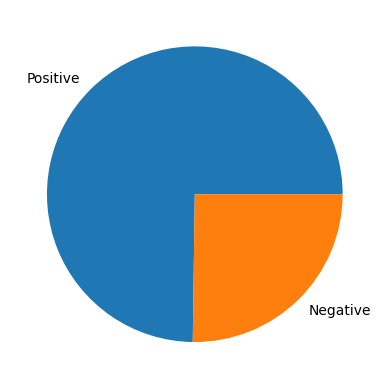

In [50]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels = ['Positive','Negative'])
plt.show()

In [51]:
!pip install imbalanced-learn
!pip install scikit-learn

In [52]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
vectorized_X_train_smote, y_train_smote = smote.fit_resample(vectorized_X_train, y_train)
print(vectorized_X_train_smote.shape, y_train_smote.shape)

(9476, 1192) (9476,)


In [53]:
y_train_smote.value_counts()

label
0    4738
1    4738
Name: count, dtype: int64

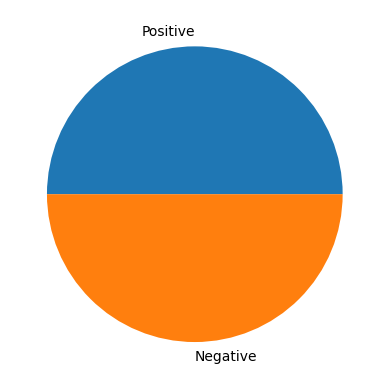

In [54]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels = ['Positive', 'Negative'])
plt.show()

# Model Training and Eveluation

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [57]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

### Logistic Regression

In [65]:
lr = LogisticRegression()
lr.fit(vectorized_X_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_X_train_smote)
y_test_pred = lr.predict(vectorized_X_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.941
	Precision = 0.914
	Recall = 0.972
	F1-Score = 0.943
Training Scores:
	Accuracy = 0.867
	Precision = 0.71
	Recall = 0.862
	F1-Score = 0.778


### Naive Bayes

In [66]:
mnb = MultinomialNB()
mnb.fit(vectorized_X_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_X_train_smote)
y_test_pred = mnb.predict(vectorized_X_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.899
	Precision = 0.867
	Recall = 0.943
	F1-Score = 0.903
Training Scores:
	Accuracy = 0.878
	Precision = 0.7
	Recall = 0.958
	F1-Score = 0.809


### Random Forest

In [67]:
rf = LogisticRegression()
rf.fit(vectorized_X_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_X_train_smote)
y_test_pred = rf.predict(vectorized_X_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.941
	Precision = 0.914
	Recall = 0.972
	F1-Score = 0.943
Training Scores:
	Accuracy = 0.867
	Precision = 0.71
	Recall = 0.862
	F1-Score = 0.778


### Decision Trees

In [68]:
dr = LogisticRegression()
dr.fit(vectorized_X_train_smote, y_train_smote)

y_train_pred = dr.predict(vectorized_X_train_smote)
y_test_pred = dr.predict(vectorized_X_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.941
	Precision = 0.914
	Recall = 0.972
	F1-Score = 0.943
Training Scores:
	Accuracy = 0.867
	Precision = 0.71
	Recall = 0.862
	F1-Score = 0.778


### Support Vector Classifier

In [69]:
svc = SVC()
svc.fit(vectorized_X_train_smote, y_train_smote)

y_train_pred = svc.predict(vectorized_X_train_smote)
y_test_pred = svc.predict(vectorized_X_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.978
	Precision = 0.961
	Recall = 0.995
	F1-Score = 0.978
Training Scores:
	Accuracy = 0.874
	Precision = 0.743
	Recall = 0.818
	F1-Score = 0.779


In [70]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)